# PCA analysis for the nhanes dataset

## libraries 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## loading the dataset

In [2]:
df = pd.read_csv('nhanes.csv')
df

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,NaN,Yes,100000.0,4.07,...,No,NaN,NaN,NaN,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,No,NaN,3.0,2.0,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,NaN,Yes,12500.0,0.39,...,No,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71909,male,28,Mexican,9 - 11th Grade,NeverMarried,Single,No,7500.0,0.46,...,No,NaN,NaN,NaN,6.0,Yes,NaN,NaN,NaN,Current
4996,71910,female,0,White,NaN,NaN,NaN,Yes,87500.0,3.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,71911,male,27,Mexican,College Grad,Married,Committed,Yes,87500.0,3.25,...,No,NaN,NaN,NaN,6.0,No,3.0,5.0,4.0,Never
4998,71915,male,60,White,College Grad,NeverMarried,Single,Yes,70000.0,5.00,...,Yes,56.0,NaN,NaN,6.0,No,1.0,NaN,0.0,Never


In [3]:
columns_names=df.columns.tolist()
print(columns_names)
df.shape

['id', 'Gender', 'Age', 'Race', 'Education', 'MaritalStatus', 'RelationshipStatus', 'Insured', 'Income', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia', 'Testosterone', 'HDLChol', 'TotChol', 'Diabetes', 'DiabetesAge', 'nPregnancies', 'nBabies', 'SleepHrsNight', 'PhysActive', 'PhysActiveDays', 'AlcoholDay', 'AlcoholYear', 'SmokingStatus']


(5000, 32)

## data cleaning 

In [4]:
# run only once
# replacing categorical data with numerical
df['Gender'].replace(['male', 'female'],[0, 1], inplace=True)
df['Race'].replace(['Asian','Black','Hispanic','Mexican','White','Other'],[1,2,3,4,5,6], inplace=True)
df['Education'].replace(['8th Grade', '9 - 11th Grade','High School','Some College','College Grad'],[0,1,2,3,4], inplace=True)
df['MaritalStatus'].replace(['NeverMarried','LivePartner','Married','Separated','Divorced','Widowed'],[1,2,3,4,5,6], inplace=True)
df['RelationshipStatus'].replace(['Single', 'Committed'],[0, 1], inplace=True)
df['Insured'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['HomeOwn'].replace(['Rent','Other','Own'],[0,1,2], inplace=True)
df['Work'].replace(['NotWorking','Looking','Working',],[0, 1,2], inplace=True)
df['Diabetes'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['PhysActive'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['nPregnancies'].replace(np.nan,0, inplace=True)
df['DiabetesAge'].replace(np.nan,0, inplace=True)

In [5]:
# clearing double entries 
for i in range(0,4999):
    if (df['id'][i]==df['id'][i+1]):
        df.drop(i,axis=0,inplace=True)
df.reset_index(drop=True)

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,0,14,1,NaN,NaN,NaN,1.0,100000.0,4.07,...,0.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN
1,62172,1,43,2,2.0,1.0,0.0,1.0,22500.0,2.02,...,0.0,0.0,3.0,2.0,8.0,0.0,2.0,3.0,104.0,Current
2,62174,0,80,5,4.0,3.0,1.0,1.0,70000.0,4.30,...,0.0,0.0,0.0,NaN,9.0,0.0,5.0,NaN,0.0,Never
3,62175,0,5,5,NaN,NaN,NaN,1.0,12500.0,0.39,...,0.0,0.0,0.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,62176,1,34,5,4.0,3.0,1.0,1.0,100000.0,5.00,...,0.0,0.0,5.0,2.0,7.0,1.0,5.0,2.0,104.0,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,71908,1,66,5,4.0,6.0,0.0,1.0,70000.0,4.55,...,0.0,0.0,2.0,2.0,6.0,0.0,NaN,1.0,5.0,Never
3207,71909,0,28,4,1.0,1.0,0.0,0.0,7500.0,0.46,...,0.0,0.0,0.0,NaN,6.0,1.0,NaN,NaN,NaN,Current
3208,71910,1,0,5,NaN,NaN,NaN,1.0,87500.0,3.37,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3209,71911,0,27,4,4.0,3.0,1.0,1.0,87500.0,3.25,...,0.0,0.0,0.0,NaN,6.0,0.0,3.0,5.0,4.0,Never


In [6]:
# replacing missing value with column's mean value
df.drop('id', axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)
df

,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,0,14,1,2.621373,2.927222,0.595117,1.0,100000.0,4.07,6.0,...,0.000000,0.0,0.0,2.463549,6.90115,0.00000,1.000000,2.956879,70.45614,NaN
1,1,43,2,2.000000,1.000000,0.000000,1.0,22500.0,2.02,4.0,...,0.000000,0.0,3.0,2.000000,8.00000,0.00000,2.000000,3.000000,104.00000,Current
3,0,80,5,4.000000,3.000000,1.000000,1.0,70000.0,4.30,7.0,...,0.000000,0.0,0.0,2.463549,9.00000,0.00000,5.000000,2.956879,0.00000,Never
4,0,5,5,2.621373,2.927222,0.595117,1.0,12500.0,0.39,7.0,...,0.000000,0.0,0.0,2.463549,6.90115,0.55864,7.000000,2.956879,70.45614,NaN
5,1,34,5,4.000000,3.000000,1.000000,1.0,100000.0,5.00,8.0,...,0.000000,0.0,5.0,2.000000,7.00000,1.00000,5.000000,2.000000,104.00000,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,1,66,5,4.000000,6.000000,0.000000,1.0,70000.0,4.55,8.0,...,0.000000,0.0,2.0,2.000000,6.00000,0.00000,3.852384,1.000000,5.00000,Never
4995,0,28,4,1.000000,1.000000,0.000000,0.0,7500.0,0.46,3.0,...,0.000000,0.0,0.0,2.463549,6.00000,1.00000,3.852384,2.956879,70.45614,Current
4996,1,0,5,2.621373,2.927222,0.595117,1.0,87500.0,3.37,10.0,...,0.083043,0.0,0.0,2.463549,6.90115,0.55864,3.852384,2.956879,70.45614,NaN
4997,0,27,4,4.000000,3.000000,1.000000,1.0,87500.0,3.25,10.0,...,0.000000,0.0,0.0,2.463549,6.00000,0.00000,3.000000,5.000000,4.00000,Never


## data preview and exploratory visualization 

In [7]:
df.corr()

,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,TotChol,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear
Gender,1.000000e+00,0.032684,0.004862,0.058886,0.123655,-0.067180,0.050255,-0.033116,-0.016927,0.012608,...,0.096457,-0.010141,-0.013271,0.476022,-1.178654e-16,0.024073,-0.051087,0.043304,-0.129630,-0.111429
Age,3.268450e-02,1.000000,0.068369,-0.079558,0.312292,0.058743,0.025509,0.002843,0.154226,0.027797,...,0.287785,0.310927,0.319312,0.380820,9.005641e-02,-0.007605,-0.208935,0.013162,-0.115828,0.052662
Race,4.862420e-03,0.068369,1.000000,0.035609,0.069742,0.074237,0.052335,0.081121,0.103018,0.153551,...,0.028470,-0.023204,-0.015055,0.005710,-9.673410e-03,0.067330,0.049020,-0.007817,-0.011944,0.074511
Education,5.888554e-02,-0.079558,0.035609,1.000000,-0.083305,0.061167,0.181139,0.352382,0.373167,0.197715,...,0.019453,-0.098743,-0.083722,-0.046267,-1.129154e-01,0.020083,0.275882,0.016698,-0.130134,0.106411
MaritalStatus,1.236552e-01,0.312292,0.069742,-0.083305,1.000000,-0.057628,0.107981,-0.060998,0.008450,0.059308,...,0.089475,0.138400,0.148295,0.255381,7.862653e-02,-0.019391,-0.122381,0.006974,-0.090373,-0.016158
RelationshipStatus,-6.717976e-02,0.058743,0.074237,0.061167,-0.057628,1.000000,0.069537,0.213892,0.171640,0.153596,...,0.010515,-0.007702,-0.011145,-0.045695,-2.954834e-02,0.052894,0.005461,0.024918,-0.084706,0.049095
Insured,5.025528e-02,0.025509,0.052335,0.181139,0.107981,0.069537,1.000000,0.174016,0.206484,0.163256,...,-0.025425,0.047590,0.059182,-0.006817,-7.531473e-03,0.011244,0.010677,-0.008086,-0.110186,0.021215
Income,-3.311570e-02,0.002843,0.081121,0.352382,-0.060998,0.213892,0.174016,1.000000,0.896266,0.445326,...,0.040200,-0.091093,-0.089031,-0.065582,-7.596001e-02,0.027052,0.167014,0.004120,-0.065544,0.114355
Poverty,-1.692732e-02,0.154226,0.103018,0.373167,0.008450,0.171640,0.206484,0.896266,1.000000,0.398076,...,0.081949,-0.033134,-0.027280,-0.018512,-9.089618e-02,0.019154,0.156181,0.019570,-0.100340,0.120545
HomeRooms,1.260793e-02,0.027797,0.153551,0.197715,0.059308,0.153596,0.163256,0.445326,0.398076,1.000000,...,0.020705,-0.029378,-0.025637,0.030977,5.887176e-03,0.049423,0.087754,0.012199,-0.065376,0.044729


Text(0.5, 1.0, 'Correlation between different fearures')

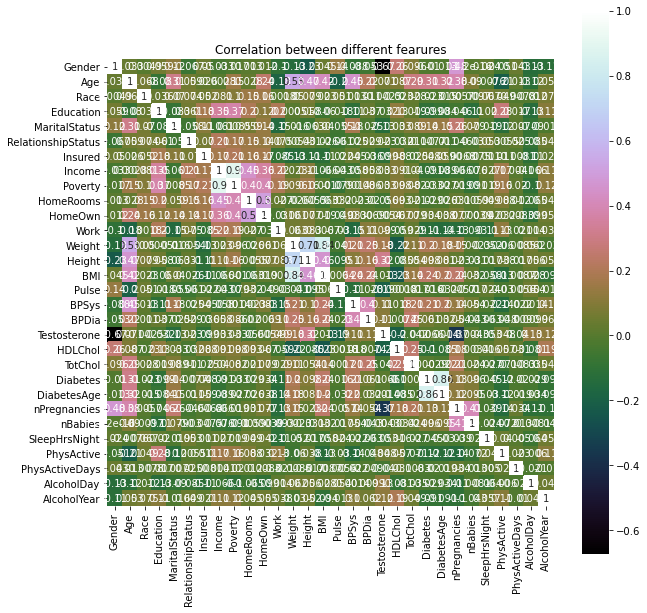

In [8]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [9]:
df['SmokingStatus'].unique()

array([nan, 'Current', 'Never', 'Former'], dtype=object)

In [10]:
smoking=df.groupby('SmokingStatus').mean()
smoking


,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,TotChol,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear
SmokingStatus,,,,,,,,,,,,,,,,,,,,,
Current,0.414692,43.753555,4.125592,2.248815,2.829384,0.552133,0.686785,46252.298932,2.224337,5.557202,...,4.964338,0.082938,3.127962,0.966825,2.415018,6.487683,0.393365,3.852033,3.892951,81.100815
Former,0.431953,55.664694,4.341223,2.510848,3.171598,0.633136,0.844181,53372.091934,2.795181,5.994266,...,4.977129,0.183432,7.915187,1.009862,2.433344,6.960552,0.540434,3.803918,2.625785,90.894218
Never,0.585209,45.385048,3.766881,2.792800,2.860815,0.594204,0.790855,56104.157486,2.800799,6.040454,...,4.992382,0.106109,4.223473,1.175241,2.492322,6.922512,0.558682,3.895959,2.683980,60.078496


In [11]:
# split data table into data X and class labels y
X = df.iloc[:,0:30].values
y = df.iloc[:,30].values
y


array([nan, 'Current', 'Never', ..., nan, 'Never', 'Never'], dtype=object)

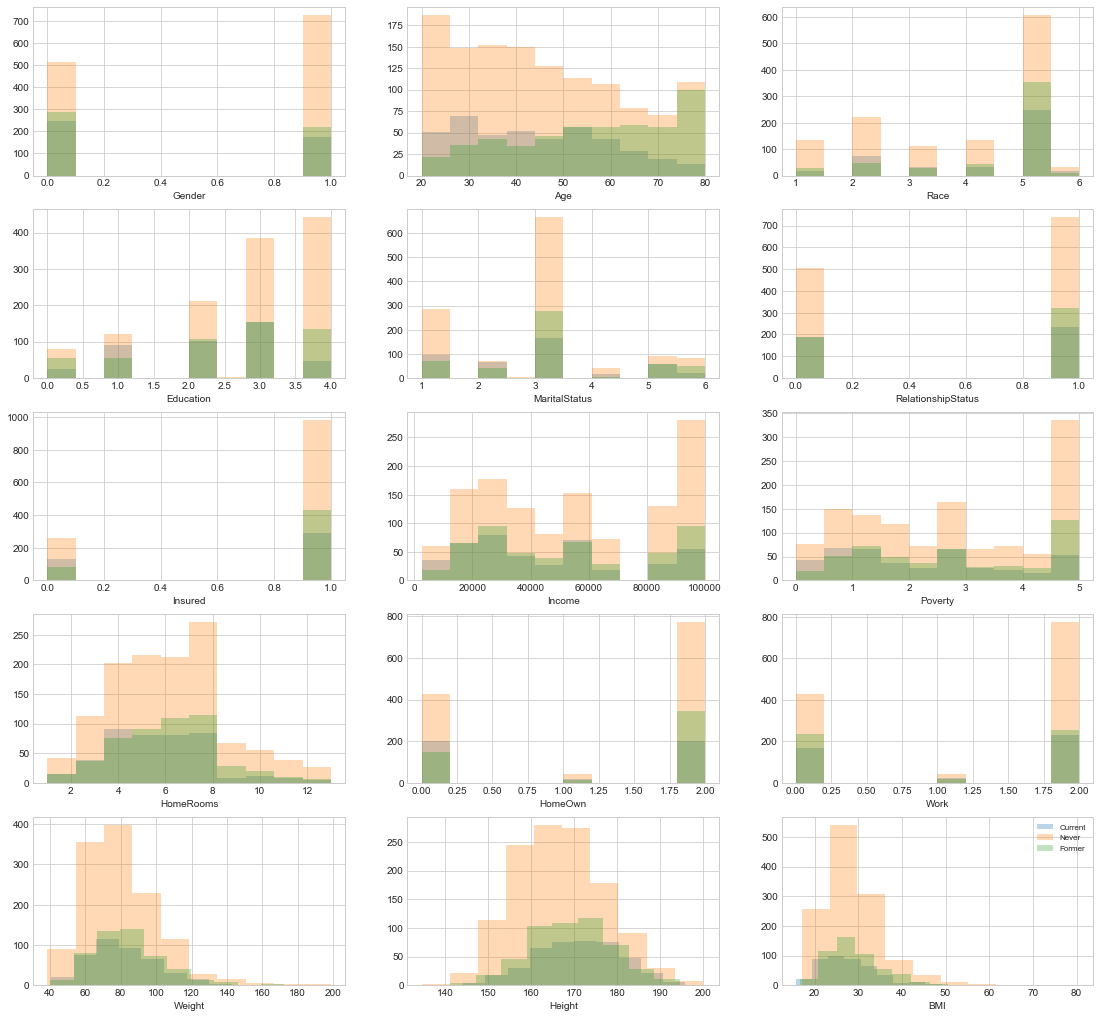

In [12]:
feature_dict = {0: 'Gender', 1: 'Age', 2: 'Race', 3: 'Education', 4: 'MaritalStatus', 
                5: 'RelationshipStatus', 6: 'Insured', 7: 'Income', 8:  'Poverty', 
                9: 'HomeRooms', 10: 'HomeOwn', 11: 'Work', 12: 'Weight', 13: 'Height',
                14: 'BMI',15: 'Pulse', 16: 'BPSys', 17: 'BPDia', 18: 'Testosterone', 
                19: 'HDLChol', 20: 'TotChol', 21: 'Diabetes', 22: 'DiabetesAge', 
                23: 'nPregnancies', 24: 'nBabies',25: 'SleepHrsNight', 26: 'PhysActive',
                27: 'PhysActiveDays', 28: 'AlcoholDay',29: 'AlcoholYear'}

def df_info_histograms(X,y,feat,numPlots):               
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(19, 18))
        for cnt in range(numPlots[0],numPlots[1]):
            plt.subplot(5, 3, cnt-numPlots[0]+1)
            for lab in ('Current', 'Never', 'Former'):
                plt.hist(X[y==lab, cnt],
                         label=lab,
                         bins=10,
                         alpha=0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        plt.show()
        
df_info_histograms(X,y,feature_dict,[0,15])

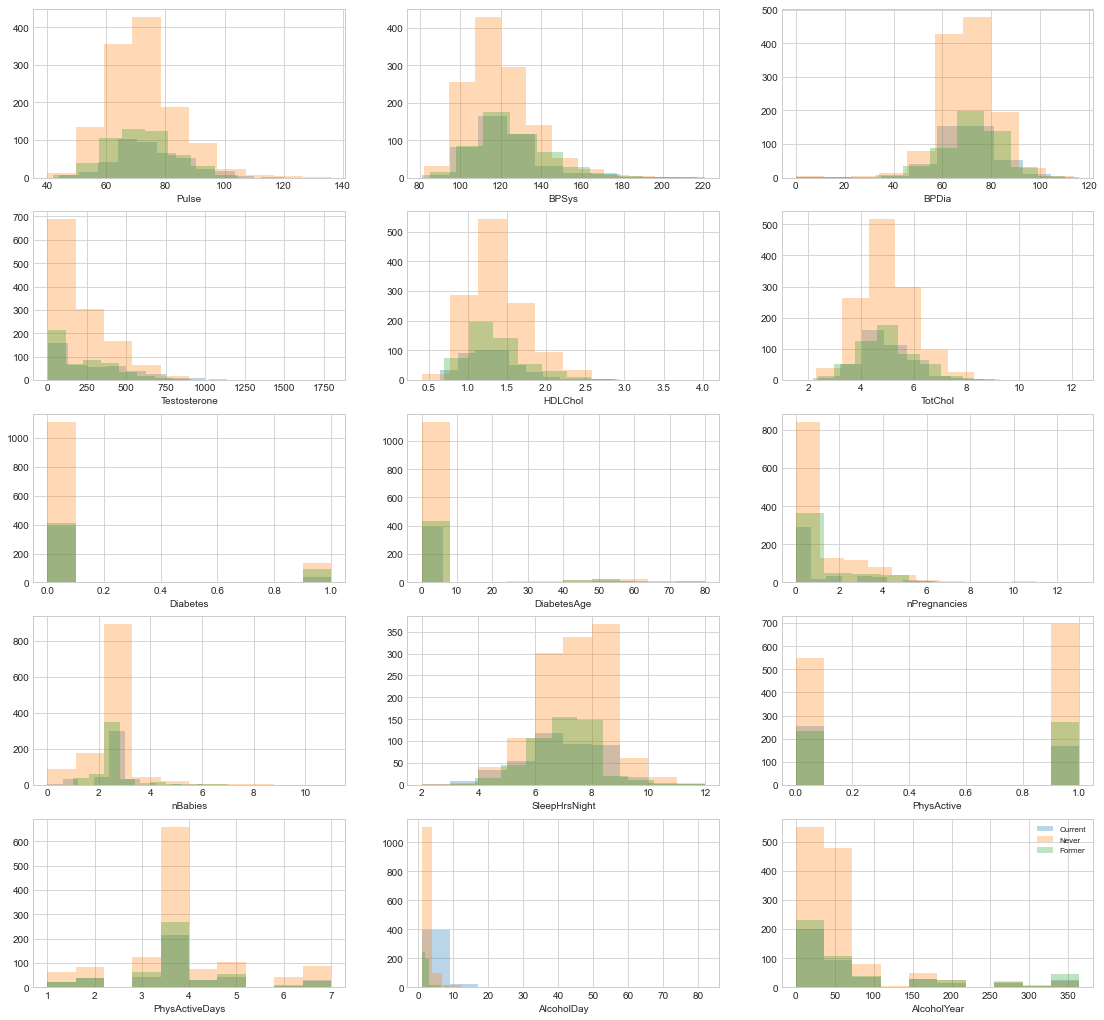

In [13]:
df_info_histograms(X,y,feature_dict,[15,30])

## data standarization

transforming the data so that mean = 0 and variance = 1 

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## covariance matrix, eigenvalues and eigenvectors

The central idea of PCA analysis is to find unit vectors that capture the direction of maximum variability in the data. To do so we have to solve either the maximize variance or the equivalent minimize the sum-of-squares problem.  

below is the definition of the error vector, where $x^{(i)}$ is the actual observation and  $u$ is the unit vector we are looking for 
\begin{align*} \\ e^{(i)}   =  x^{(i)}  - u\big( {x^{(i)}}^Tu \big)
\\
\end{align*}


\begin{equation} \lVert e^{(i)} \rVert ^2  = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^2
 = \lVert x^{(i)} \rVert ^2 - \big( {x^{(i)}}^Tu \big)^T\big( {x^{(i)}}^Tu \big) 
 = \lVert x^{(i)} \rVert ^2 - u^Tx^{(i)}{x^{(i)}}^Tu \\
\end{equation}
We begin by the minimize the sum-of-squares problem
 
\begin{align*}\text{minimize}\; \frac {1}{m} \sum\limits_{i=1}^{m} \lVert e^{(i)} \rVert ^2
= \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2 - 
\frac{1}{m}\sum\limits_{i=1}^{m}u^Tx^{(i)}{x^{(i)}}^Tu 
 = \frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2  - 
u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u \end{align*}

\begin{align*} \text{minimize} \; \underbrace{\frac {1}{m} \sum\limits_{i=1}^{m} \lVert x^{(i)} \rVert ^2}_{\text{constant given $x_i$}}  - 
 \underbrace{u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u}_{\text{maximize}} 
\implies &\text{maximize} \;
 u^T\left(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}{x^{(i)}}^T\right)u =\\\\= \max \; u^T S u \\ \end{align*}

As a result of our computations the equivalent maximize variance problem came up. $S$ is the covariance matrix. 

We then reinterpret the problem in a optimization fashion:

\begin{align*} \text{maximize} \; & u^TSu \\
\text{subject to} \;
& u^Tu = 1\end{align*}



\begin{align*} \\& u^TSu = u^T\lambda u = \lambda u^Tu = \lambda \;\\ 
&(\text{Eigen analysis} : Su = \lambda u) \\ \\\end{align*}

In [15]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.85493826e-02 -5.11453893e-02 -4.45440852e-01 -2.61093142e-01
  -2.09992704e-01 -5.27546451e-02  4.66468487e-02 -2.29455131e-02
   9.60089860e-02  6.57646348e-02 -7.25573847e-01  1.89377817e-02
   1.63121395e-01  8.92003806e-02 -1.13173000e-01 -9.85706624e-02
  -1.19047686e-02  1.98413490e-02  2.00530614e-02 -4.14281266e-02
   6.24253257e-03 -1.39534087e-01 -6.12640147e-02  5.29173179e-02
   2.16507649e-01 -2.89172686e-02 -3.77790119e-03 -3.42449875e-02
  -7.19215472e-02 -1.27900377e-02]
 [ 4.25770182e-01  5.53274733e-02 -1.03976723e-01 -1.11968024e-02
   1.59244059e-01  2.54278058e-01 -3.15571441e-02  8.52072673e-02
  -8.21053396e-02  7.12116464e-01  1.21289078e-01 -7.92031383e-02
   2.34140142e-01  2.10053752e-01 -7.71445345e-03  1.51949320e-02
  -8.89314607e-02 -4.97343233e-02  1.57584399e-01 -8.15011996e-02
  -5.83538927e-02  1.09740830e-02  1.46844695e-02 -1.29438375e-02
  -3.01232000e-02 -5.50290212e-02 -1.92863607e-02 -7.08595822e-02
  -1.27501703e-01 -3.206786

In [16]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.657580729926547
3.1558877185034286
2.686300682715971
1.7819715253136557
1.5766518704666983
1.3123555611683873
1.1877931883829425
1.152028538610736
1.1066868823991554
1.018818621017458
0.9982123429672266
0.9552704091627061
0.9245144377721097
0.875458056693195
0.8388310586395414
0.809965043037226
0.7842066398738307
0.734062390481408
0.6843002665350009
0.6090471994222205
0.5955943401001855
0.5021267097888074
0.4844831938537294
0.4017092009654594
0.3374130115707651
0.28556893072580447
0.24339620321765318
0.14098796553933673
0.08917886006635688
0.07894421547498646


In [18]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

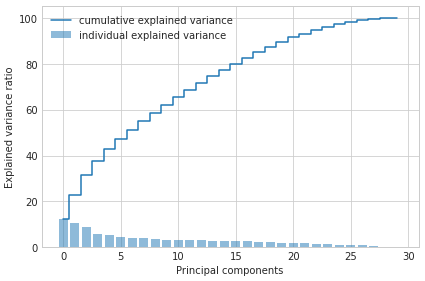

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.02854938 -0.05114539]
 [ 0.42577018  0.05532747]
 [ 0.03580216  0.12002882]
 [-0.06603657  0.30342615]
 [ 0.13156258 -0.0287884 ]
 [ 0.00775506  0.17352036]
 [-0.02742204  0.15701103]
 [-0.01476152  0.47849794]
 [ 0.04810885  0.48035088]
 [-0.00145653  0.34042749]
 [ 0.09488461  0.315038  ]
 [-0.06095638  0.15880675]
 [ 0.40949728  0.0445708 ]
 [ 0.31260573  0.11717869]
 [ 0.38503513 -0.03616973]
 [-0.07737234 -0.05810217]
 [ 0.27936083 -0.01281321]
 [ 0.20006467  0.06313123]
 [ 0.0727232   0.05645612]
 [-0.06377866  0.09915755]
 [ 0.14937312  0.06257906]
 [ 0.2740111  -0.10212487]
 [ 0.26360317 -0.09941662]
 [ 0.1992251  -0.0653378 ]
 [ 0.08117072 -0.09357676]
 [-0.04053524  0.0376309 ]
 [-0.12795623  0.17163778]
 [-0.00974936  0.01214486]
 [-0.0134433  -0.08402374]
 [-0.01903491  0.13889815]]


those eigenvectors are pc1 and pc2 each of their elements represent the percentage of the corresponding variable used in the according pc

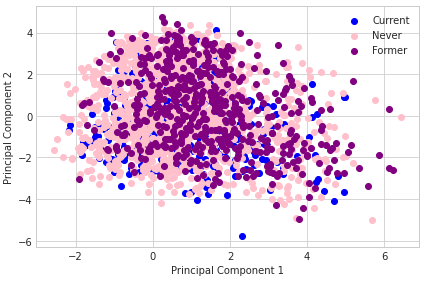

In [21]:
Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Current', 'Never', 'Former'), 
                        ('blue', 'pink', 'purple')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.tight_layout()

pc1 and pc2 help explain around 20% of the variance in the data, this is not an satisfactory result , given this analysis we would need at least 10 pc's to account for a significant amount of the variance